In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

In [6]:
dataset = pd.read_csv("Downloads/creditcard.csv")
dataset.head(5)
dataset.shape

(284807, 31)

In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Class as pie chart: 


Text(0, 0.5, '')

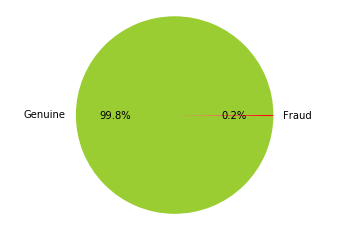

In [11]:
print("Class as pie chart: ")
fig, ax = plt.subplots(1, 1)
ax.pie(dataset.Class.value_counts(), autopct = '%1.1f%%', labels=["Genuine", "Fraud"], colors=["yellowgreen", 'r'])
plt.axis('equal')
plt.ylabel('')

Time Variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

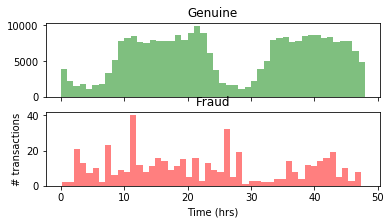

In [14]:
print("Time Variable")
dataset["Time_Hr"] = dataset["Time"]/3600 # Convert seconds to hour
print(dataset["Time_Hr"].tail())
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6, 3))
ax1.hist(dataset.Time_Hr[dataset.Class == 0], bins=48, color = 'g', alpha = 0.5)
ax1.set_title('Genuine')
ax2.hist(dataset.Time_Hr[dataset.Class == 1], bins=48, color = 'r', alpha = 0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

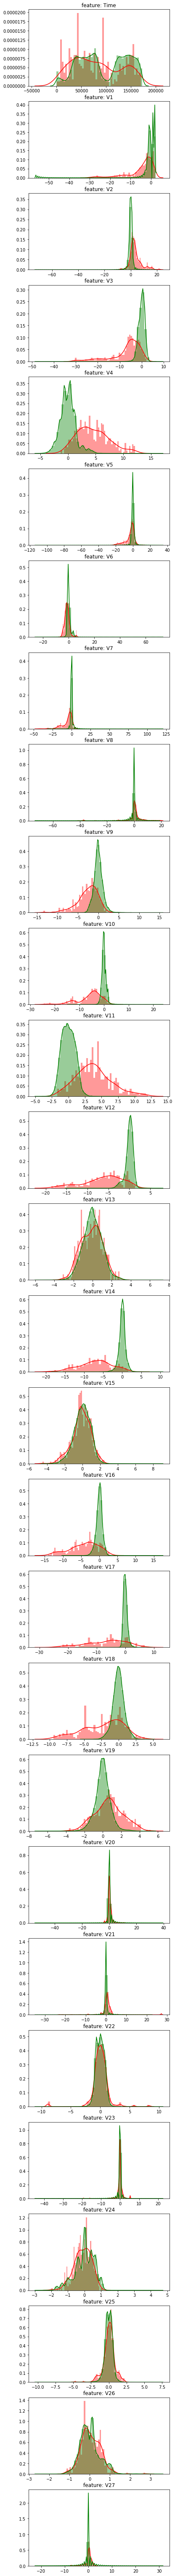

In [17]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6, 28*4))
for i, col in enumerate(dataset[dataset.iloc[:, 0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(dataset[col][dataset.Class == 1], bins = 50, color = 'r')
    sns.distplot(dataset[col][dataset.Class == 0], bins = 50, color = 'g')  
    ax5.set_xlabel('')
    ax5.set_title(f'feature: {str(col)}')
plt.show()

In [7]:
# columns to not drop: 4, 10, 11, 12, 14, 16, 17, 18, 3, 9
def split_data(dataset, drop_list):
    dataset = dataset.drop(drop_list, axis = 1)
    print(dataset.columns)
    # test, train, split time
    X = dataset.drop(["Class"], axis = 1).values
    y = dataset["Class"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Train-set size = {len(y_train)}, Test-set size = {len(y_test)}, fraud cases in test-set = {sum(y_test)}")
    return X_train, X_test, y_train, y_test

In [37]:
drop_list = ["V1", "V2", "V5", "V6", "V7", "V8", "V13", "V15", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27"]
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
# print(X_train, X_test, y_train, y_test)

Index(['Time', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18', 'V28', 'Amount', 'Class'],
      dtype='object')
Train-set size = 227845, Test-set size = 56962, fraud cases in test-set = 98


In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))

cl2 = GaussianNB()
y_pred, y_pred_prob = get_predictions(cl2, X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

99.7524665566518
[[56752   112]
 [   29    69]]
train_set confusion matrix: [[227100    351]
 [   112    282]]
train_set confusion matrix: [[5675200   11200]
 [   2900    6900]]
Recall score: 70.40816326530613
Precision score: 38.12154696132597
F1 score: 49.462365591397855
Accuracy score: 99.7524665566518


IndexError: too many indices for array

In [29]:
def get_predictions(clf, X_train, y_train, X_test):
    clf = clf
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict(X_test)
    train_pred = clf.predict(X_train)
    print(f"train_set confusion matrix: {confusion_matrix(y_train, train_pred)}")
    return y_pred, y_pred_prob

In [35]:
def print_scores(y_test, y_pred, y_pred_prob):
    print(f"train_set confusion matrix: {confusion_matrix(y_test, y_pred)*100}")
    print(f"Recall score: {recall_score(y_test, y_pred)*100}")
    print(f"Precision score: {precision_score(y_test, y_pred)*100}")
    print(f"F1 score: {f1_score(y_test, y_pred)*100}")
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)*100}")
    print("ROC AUC: {}" .format(roc_auc_score(y_test, y_pred_prob[:,1])))
    

In [36]:
# case 1 - Do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(dataset, drop_list)
y_predy_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Train-set size = 227845, Test-set size = 56962, fraud cases in test-set = 98
train_set confusion matrix: [[225948   1503]
 [   140    254]]
train_set confusion matrix: [[5675200   11200]
 [   2900    6900]]
Recall score: 70.40816326530613
Precision score: 38.12154696132597
F1 score: 49.462365591397855
Accuracy score: 99.7524665566518


IndexError: too many indices for array

In [41]:
!pip install lazypredict

In [43]:
from lazypredict.Supervised import LazyClassifier

ImportError: cannot import name 'all_estimators' from 'sklearn.utils' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py)